In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

loan =pd.read_csv("loan.csv")
display(loan.head())
display(loan.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


None

In [2]:
loan = loan.drop("Loan_ID",axis=1)

## Standard scaling of the continuous columns only

for i in ["ApplicantIncome","CoapplicantIncome","LoanAmount"]:
    loan[i] = (loan[i] - loan[i].mean())/loan[i].std()

### Outlier Detection using z-score

OutlierRows = loan[(loan["LoanAmount"]>3) |(loan["LoanAmount"]<-3) |
                   (loan["ApplicantIncome"]>3)|(loan["ApplicantIncome"]<-3)|
                   (loan["CoapplicantIncome"]>3)|(loan["CoapplicantIncome"]<-3)]

print("% of Outlier rows in the dataset is " + str(len(OutlierRows)/len(loan)*100)+"\n")
loan_OutlierFree = loan.drop(OutlierRows.index,axis=0)

### Missing Value Detection & treatment

MV = loan_OutlierFree.isna().sum()
print("% of Missing values by columns are")
print(MV[MV>0]/len(loan_OutlierFree)*100)

for i in MV[MV>0].index:
    
    if (i == "LoanAmount"):
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].median(),inplace=True)
    else:
        loan_OutlierFree[i].fillna(loan_OutlierFree[i].mode()[0],inplace=True)

loan_noOutlierNoMV = loan_OutlierFree

#Converting all binary categorical columns into label encoded columns

loan_noOutlierNoMV["Loan_Status"].replace(['Y','N'],[1,0],inplace = True)
loan_noOutlierNoMV["Gender"].replace(['Male','Female'],[1,0],inplace = True)
loan_noOutlierNoMV["Married"].replace(['Yes','No'],[1,0],inplace = True)
loan_noOutlierNoMV["Education"].replace(['Graduate','Not Graduate'],[1,0],inplace = True)
loan_noOutlierNoMV["Self_Employed"].replace(['Yes','No'],[1,0],inplace = True)

#Converting all >2 class categorical columns into one-hot encoded columns

loan_new = pd.get_dummies(loan_noOutlierNoMV)

loan_new.info()
loan_new.head()

% of Outlier rows in the dataset is 3.908794788273615

% of Missing values by columns are
Gender            1.864407
Married           0.508475
Dependents        2.542373
Self_Employed     4.915254
LoanAmount        3.728814
Credit_History    7.966102
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   590 non-null    int64  
 1   Married                  590 non-null    int64  
 2   Education                590 non-null    int64  
 3   Self_Employed            590 non-null    int64  
 4   ApplicantIncome          590 non-null    float64
 5   CoapplicantIncome        590 non-null    float64
 6   LoanAmount               590 non-null    float64
 7   Credit_History           590 non-null    float64
 8   Loan_Status              590 non-null    int64  
 9   Dependents_0             590 

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,0.072931,-0.554036,-0.250179,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,-0.134302,-0.038700,-0.215127,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.393427,-0.554036,-0.939534,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.461686,0.251774,-0.308599,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,0.097649,-0.554036,-0.063236,1.0,1,1,0,0,0,0,0,1


In [4]:
# Data Splitting

X = loan_new.drop("Loan_Status",axis=1)
y = loan_new["Loan_Status"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=111)
len(X_train),len(X_test)

(413, 177)

## Apply Decision Tree, Bagging Classifier, Random Forest & Adaboost classifier

In [10]:
# Load Library

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Fit a Decision Tree model as comparison

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("F1-Score of Decision Tree is {}".format(f1_score(y_test, y_pred)))
print("Accuaracy of Decision Tree is {}".format(accuracy_score(y_test, y_pred)))

F1-Score of Decision Tree is 0.7966101694915254
Accuaracy of Decision Tree is 0.7288135593220338


F1-Score of Bagging Classifier of Decision Tree is 0.8253968253968255
Accuaracy of Bagging Classifier of Decision Tree is 0.751412429378531


Text(0.5, 1.0, 'Bagging Classifier: F1 Score vs no. of estimators')

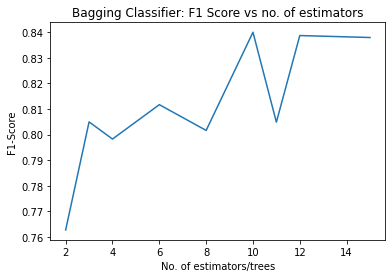

In [16]:
from sklearn.ensemble import BaggingClassifier

#fit the model
clf = BaggingClassifier(n_estimators=100)

### Note: Parameter - n_estimators stands for how many tree we want to grow

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("F1-Score of Bagging Classifier of Decision Tree is {}".format(f1_score(y_test, y_pred)))
print("Accuaracy of Bagging Classifier of Decision Tree is {}".format(accuracy_score(y_test, y_pred)))

estimator_range=[2,3,4,6,8,10,11,12,15] # you can take a generated sequence using np.arange too

models=[]
scores=[]
for i in estimator_range:
    
    clf = BaggingClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     models.append(clf)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("Bagging Classifier: F1 Score vs no. of estimators")

F1-Score of Random Forest Classifier of Decision Tree is 0.8392156862745098
Accuaracy of Random Forest Classifier of Decision Tree is 0.768361581920904
Estimator no. with highest F1 Score is: 19


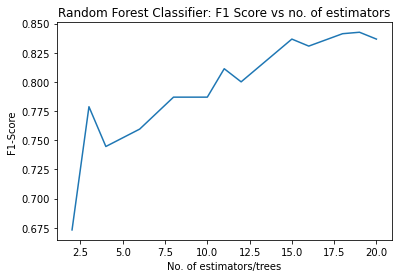

In [26]:
from sklearn.ensemble import RandomForestClassifier

#fit the model
clf = RandomForestClassifier(n_estimators=100, max_features='auto')

### Note: Parameter - n_estimators stands for how many tree we want to grow

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("F1-Score of Random Forest Classifier of Decision Tree is {}".format(f1_score(y_test, y_pred)))
print("Accuaracy of Random Forest Classifier of Decision Tree is {}".format(accuracy_score(y_test, y_pred)))

estimator_range=[2,3,4,6,8,10,11,12,15,16,18,19,20] # you can take a generated sequence using np.arange too

models=[]
scores=[]
for i in estimator_range:
    
    clf = RandomForestClassifier(n_estimators=i, max_features='auto',random_state=11)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     models.append(clf)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("Random Forest Classifier: F1 Score vs no. of estimators")

for i in range(len(scores)):
    if(scores[i] == max(scores)):
        print("Estimator no. with highest F1 Score is: {}".format(estimator_range[i]))

F1-Score of AdaBoost Classifier with n_estimator = 100 of Decision Tree is 0.8392156862745098
Accuaracy of AdaBoost Classifier with n_estimator = 100 of Decision Tree is 0.768361581920904
Estimator no. with highest F1 Score is: 4


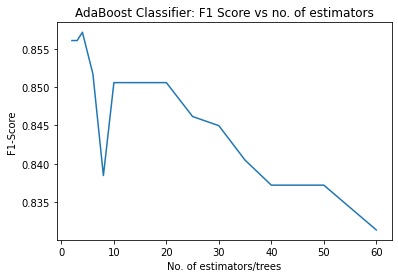

In [34]:
from sklearn.ensemble import AdaBoostClassifier

#fit the model
clf = AdaBoostClassifier(n_estimators=100)

### Note: Parameter - n_estimators stands for how many tree we want to grow

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("F1-Score of AdaBoost Classifier with n_estimator = 100 of Decision Tree is {}".format(f1_score(y_test, y_pred)))
print("Accuaracy of AdaBoost Classifier with n_estimator = 100 of Decision Tree is {}".format(accuracy_score(y_test, y_pred)))

estimator_range=[2,3,4,6,8,10,11,12,15,16,18,19,20,25,30,35,40,50,60] # you can take a generated sequence using np.arange too

models=[]
scores=[]
for i in estimator_range:
    
    clf = AdaBoostClassifier(n_estimators=i, random_state= 855)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
#     models.append(clf)
    scores.append(f1_score(y_test, y_pred))
    
plt.plot(estimator_range,scores)
plt.xlabel("No. of estimators/trees")
plt.ylabel("F1-Score")
plt.title("AdaBoost Classifier: F1 Score vs no. of estimators")

for i in range(len(scores)):
    if(scores[i] == max(scores)):
        print("Estimator no. with highest F1 Score is: {}".format(estimator_range[i]))